In [2]:
import shap
import joblib
import pandas as pd
import sklearn
from sklearn.metrics import accuracy_score

c:\Users\LENOVO\Desktop\Explainify\xai\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
shap.initjs()

In [4]:
train_set = pd.read_csv(r"C:\Users\LENOVO\Desktop\Explainify\data\processed\smote_train.csv")
test_set = pd.read_csv(r"C:\Users\LENOVO\Desktop\Explainify\data\processed\test.csv")

In [5]:
x_train = train_set.drop("Churn", axis = 1)
x_test = test_set.drop("Churn", axis = 1)

In [6]:
lr_model = joblib.load(r"C:\Users\LENOVO\Desktop\Explainify\notebooks\lr_model.pkl")

In [7]:
lr_model

LogisticRegression()

In [10]:
explainer = shap.LinearExplainer(
    lr_model, 
    x_train, 
    feature_perturbation="interventional")

c:\Users\LENOVO\Desktop\Explainify\xai\Lib\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


In [11]:
explanation = explainer(x_test)

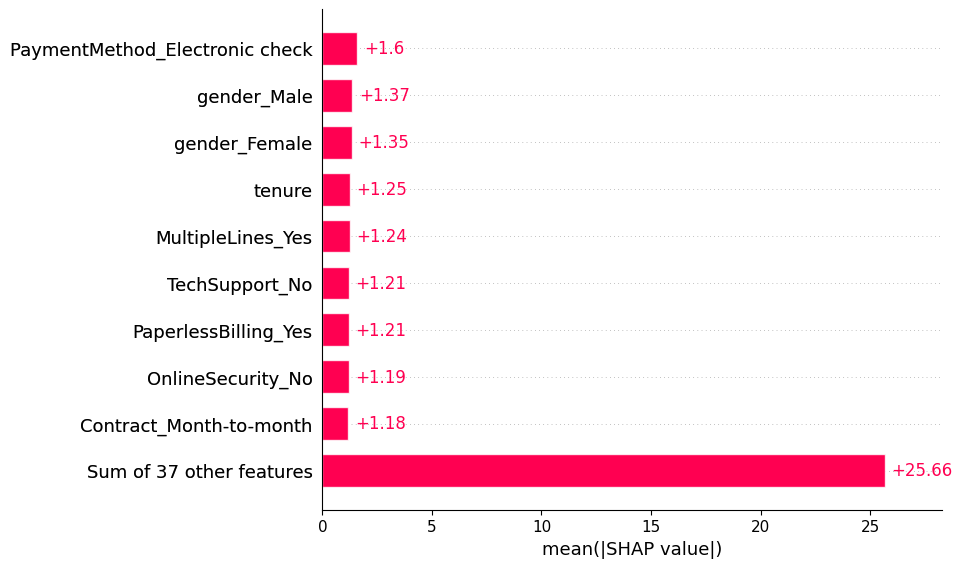

In [ ]:
shap.plots.bar(explanation)

```paymentMethod_Electronic check ``` induces the highest positive shift towards the positive class of the target variable

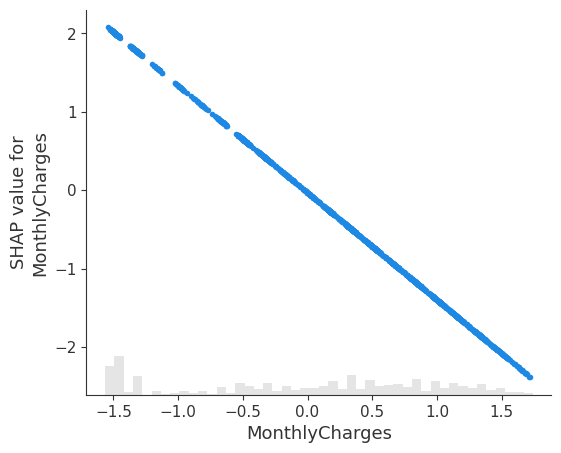

In [17]:
feature = "MonthlyCharges"
shap.plots.scatter(explanation[:, feature])

Cheaper plans tend to be associated with a higher likelihood of churn, as indicated by the plot above.

Since logistic regression is a linear model, we can make similar assumptions using the coefficients of the model

In [27]:
print(f"This coefficient of the model corresponds to the MonthlyCharges feature: {list(lr_model.coef_)[0][1]}")

This coefficient of the model corresponds to the MonthlyCharges feature: -1.367309779393799


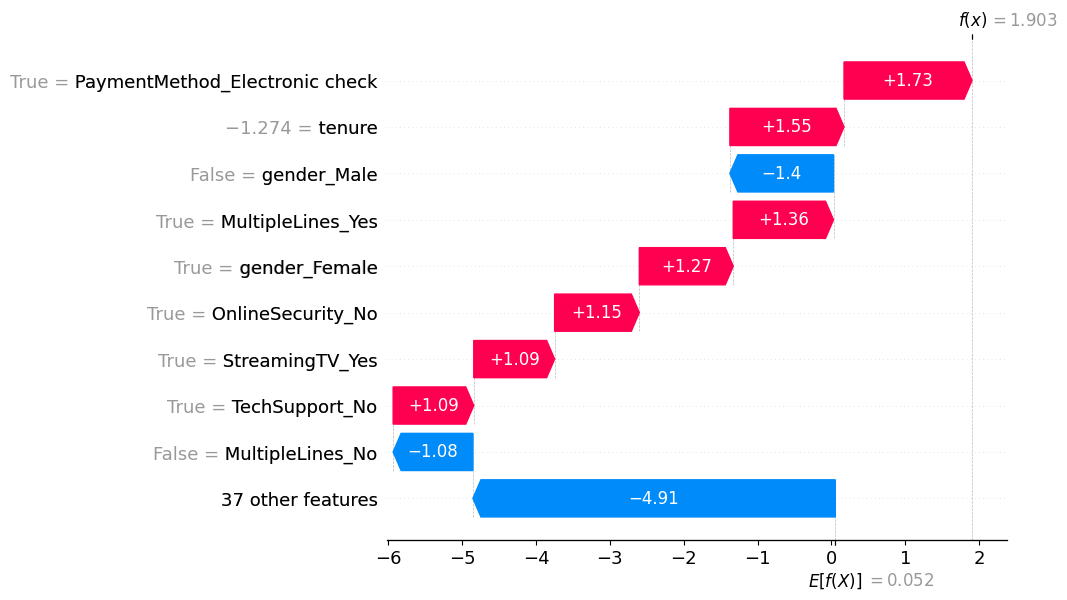

In [ ]:
i = 10
shap.plots.waterfall(explanation[i])

This is the plot for the 10th customer: <br>

On the far left is the baseline model output ie, ```E[f(x)]```, <br>
The red bars push the prediction higher, indicating a positive contribution to the likelihood of churn. The blue bars push the prediction lower, indicating a negative contribution to the likelihood of churn. <br>

A simple observation is the fact that Female customers are more likely to churn than Male customers. (this is indicated by the red bar for ```gender_Female```, and the blue bar for ```gender_Male```)


In [19]:
shap.plots.force(explanation[i])